In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

df_2022 = pd.read_csv("kaggle_survey_2022_responses.csv")
df_2021 = pd.read_csv("kaggle_survey_2021_responses.csv")
df_2020 = pd.read_csv("kaggle_survey_2020_responses.csv")

C:\Users\HYQ\AppData\Local\Temp\ipykernel_15368\2947735726.py:7: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv("kaggle_survey_2022_responses.csv")
C:\Users\HYQ\AppData\Local\Temp\ipykernel_15368\2947735726.py:8: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv("kaggle_survey_2021_responses.csv")
C:\Users\HYQ\AppData\Local\Temp\ipykernel_15368\2947735726.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = pd.read_csv("kaggle_survey_2020_responses.csv")


In [2]:
# Get the questions' titles
question_title_2020 =  df_2020[0:1]
question_title_2021 =  df_2021[0:1]
question_title_2022 =  df_2022[0:1]

# add year column
df_2020['year'] = 2020
df_2021['year'] = 2021
df_2022['year'] = 2022

# # remove the first row, which is the question row
df_2020 = df_2020.iloc[1:]
df_2021 = df_2021.iloc[1:]
df_2022 = df_2022.iloc[1:]

In [3]:
df_2020.shape[0], df_2021.shape[0],df_2022.shape[0]

(20036, 25973, 23997)

df_2020['Time from Start to Finish (seconds)'] = df_2020['Time from Start to Finish (seconds)'].astype(int)
df_2021['Time from Start to Finish (seconds)'] = df_2021['Time from Start to Finish (seconds)'].astype(int)
df_2022['Duration (in seconds)'] = df_2022['Duration (in seconds)'].astype(int)
df_2020 = df_2020[df_2020['Time from Start to Finish (seconds)']>60]
df_2021 = df_2021[df_2021['Time from Start to Finish (seconds)']>60]
df_2022 = df_2022[df_2022['Duration (in seconds)']>60]



## Construct the combined dataset

In [4]:
# construct the combined dataset
data = pd.DataFrame()
data['year'] = pd.concat([df_2020['year'], df_2021['year'], df_2022['year']])
data['age'] = pd.concat([df_2020['Q1'], df_2021['Q1'], df_2022['Q2']])
data['gender'] = pd.concat([df_2020['Q2'], df_2021['Q2'], df_2022['Q3']])
data['region'] = pd.concat([df_2020['Q3'], df_2021['Q3'], df_2022['Q4']])
data['highest_edu_lv'] = pd.concat([df_2020['Q4'], df_2021['Q4'], df_2022['Q8']]) #What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
data['duration'] = pd.concat([df_2020['Time from Start to Finish (seconds)']
                            ,df_2021['Time from Start to Finish (seconds)']
                            ,df_2022['Duration (in seconds)']],ignore_index=True)

#occupation
data['role_title'] = pd.concat([df_2020['Q5'], df_2021['Q5'], df_2022['Q23']]) # Select the title most similar to your current role (or most recent title if retired): - Selected Choice
data['salary'] = pd.concat([df_2020['Q24'], df_2021['Q25'], df_2022['Q29']]) #What is your current yearly compensation (approximate $USD)?
data['company_size'] = pd.concat([df_2020['Q20'], df_2021['Q21'], df_2022['Q25']]) #What is the size of the company where you are employed?
#data['industry'] = pd.concat([df_2020['Q19'], df_2021['Q20'], df_2022['Q24']]) #2020 no data
  #important activity
data['do_analyze_data'] = pd.concat([df_2020['Q23_Part_1'], df_2021['Q24_Part_1'], df_2022['Q28_1']]).fillna(0).astype(bool).astype(int)
data['do_build_data_infra'] = pd.concat([df_2020['Q23_Part_2'], df_2021['Q24_Part_2'], df_2022['Q28_2']]).fillna(0).astype(bool).astype(int)
data['do_build_ml_prototypes'] = pd.concat([df_2020['Q23_Part_3'], df_2021['Q24_Part_3'], df_2022['Q28_3']]).fillna(0).astype(bool).astype(int)
data['do_build_ml_service'] = pd.concat([df_2020['Q23_Part_4'], df_2021['Q24_Part_4'], df_2022['Q28_4']]).fillna(0).astype(bool).astype(int)
data['do_experiment_ml_models'] = pd.concat([df_2020['Q23_Part_5'], df_2021['Q24_Part_5'], df_2022['Q28_5']]).fillna(0).astype(bool).astype(int)
data['do_ml_research'] = pd.concat([df_2020['Q23_Part_6'], df_2021['Q24_Part_6'], df_2022['Q28_6']]).fillna(0).astype(bool).astype(int)
data['do_none'] = pd.concat([df_2020['Q23_Part_7'], df_2021['Q24_Part_7'], df_2022['Q28_7']]).fillna(0).astype(bool).astype(int)
data['do_other'] = pd.concat([df_2020['Q23_OTHER'], df_2021['Q24_OTHER'], df_2022['Q28_8']]).fillna(0).astype(bool).astype(int)

# programming skill
data['year_of_coding'] = pd.concat([df_2020['Q6'], df_2021['Q6'], df_2022['Q11']])
  # programming language
data['use_python'] = pd.concat([df_2020['Q7_Part_1'], df_2021['Q7_Part_1'], df_2022['Q12_1']]).fillna(0).astype(bool).astype(int)
data['use_r'] = pd.concat([df_2020['Q7_Part_2'], df_2021['Q7_Part_2'], df_2022['Q12_2']]).fillna(0).astype(bool).astype(int)
data['use_sql'] = pd.concat([df_2020['Q7_Part_3'], df_2021['Q7_Part_3'], df_2022['Q12_3']]).fillna(0).astype(bool).astype(int)
data['use_c'] = pd.concat([df_2020['Q7_Part_4'], df_2021['Q7_Part_4'], df_2022['Q12_4']]).fillna(0).astype(bool).astype(int)
data['use_python'] = pd.concat([df_2020['Q7_Part_1'], df_2021['Q7_Part_1'], df_2022['Q12_1']]).fillna(0).astype(bool).astype(int)
data['use_c++'] = pd.concat([df_2020['Q7_Part_5'], df_2021['Q7_Part_5'], df_2022['Q12_6']]).fillna(0).astype(bool).astype(int)
data['use_java'] = pd.concat([df_2020['Q7_Part_6'], df_2021['Q7_Part_6'], df_2022['Q12_7']]).fillna(0).astype(bool).astype(int)
data['use_javascript'] = pd.concat([df_2020['Q7_Part_7'], df_2021['Q7_Part_7'], df_2022['Q12_8']]).fillna(0).astype(bool).astype(int)
data['use_julia'] = pd.concat([df_2020['Q7_Part_8'], df_2021['Q7_Part_8'], df_2022['Q12_9']]).fillna(0).astype(bool).astype(int)
data['use_bash'] = pd.concat([df_2020['Q7_Part_10'], df_2021['Q7_Part_10'], df_2022['Q12_9']]).fillna(0).astype(bool).astype(int)
data['use_matlab'] = pd.concat([df_2020['Q7_Part_11'], df_2021['Q7_Part_11'], df_2022['Q12_11']]).fillna(0).astype(bool).astype(int)
data['use_none'] = pd.concat([df_2020['Q7_Part_12'], df_2021['Q7_Part_12'], df_2022['Q12_14']]).fillna(0).astype(bool).astype(int)
data['use_other'] = pd.concat([df_2020['Q7_OTHER'], df_2021['Q7_OTHER'], df_2022['Q12_15']]).fillna(0).astype(bool).astype(int)

# ML skill
data['year_of_ml'] = pd.concat([df_2020['Q15'], df_2021['Q15'], df_2022['Q16']]) #For how many years have you used machine learning methods?
  #ML framework
data['ml_use_scikit_learn'] = pd.concat([df_2020['Q16_Part_1'], df_2021['Q16_Part_1'], df_2022['Q17_1']]).fillna(0).astype(bool).astype(int)
data['ml_use_tensorflow'] = pd.concat([df_2020['Q16_Part_2'], df_2021['Q16_Part_2'], df_2022['Q17_2']]).fillna(0).astype(bool).astype(int)
data['ml_use_keras'] = pd.concat([df_2020['Q16_Part_3'], df_2021['Q16_Part_3'], df_2022['Q17_3']]).fillna(0).astype(bool).astype(int)
data['ml_use_pytorch'] = pd.concat([df_2020['Q16_Part_4'], df_2021['Q16_Part_4'], df_2022['Q17_4']]).fillna(0).astype(bool).astype(int)
data['ml_use_fastai'] = pd.concat([df_2020['Q16_Part_5'], df_2021['Q16_Part_5'], df_2022['Q17_5']]).fillna(0).astype(bool).astype(int)
data['ml_use_xgboost'] = pd.concat([df_2020['Q16_Part_7'], df_2021['Q16_Part_7'], df_2022['Q17_6']]).fillna(0).astype(bool).astype(int)
data['ml_use_lightgbm'] = pd.concat([df_2020['Q16_Part_8'], df_2021['Q16_Part_8'], df_2022['Q17_7']]).fillna(0).astype(bool).astype(int)
data['ml_use_catboost'] = pd.concat([df_2020['Q16_Part_9'], df_2021['Q16_Part_9'], df_2022['Q17_8']]).fillna(0).astype(bool).astype(int)
data['ml_use_caret'] = pd.concat([df_2020['Q16_Part_12'], df_2021['Q16_Part_12'], df_2022['Q17_9']]).fillna(0).astype(bool).astype(int)
data['ml_use_tidymodels'] = pd.concat([df_2020['Q16_Part_13'], df_2021['Q16_Part_13'], df_2022['Q17_10']]).fillna(0).astype(bool).astype(int)
data['ml_use_jax'] = pd.concat([df_2020['Q16_Part_14'], df_2021['Q16_Part_14'], df_2022['Q17_11']]).fillna(0).astype(bool).astype(int)
#data['ml_use_pytorch_lightning'] = pd.concat([df_2020['Q16_Part_15'], df_2021['Q16_Part_15'], df_2022['Q17_12']]).fillna(0).astype(bool).astype(int)
# data['ml_use_huggingface'] = pd.concat([df_2020[''], df_2021['Q16_Part_16'], df_2022['Q17_13']]).fillna(0).astype(bool).astype(int)
data['ml_use_none'] = pd.concat([df_2020['Q16_Part_15'], df_2021['Q16_Part_17'], df_2022['Q17_14']]).fillna(0).astype(bool).astype(int)
data['ml_use_other'] = pd.concat([df_2020['Q16_OTHER'], df_2021['Q16_OTHER'], df_2022['Q17_15']]).fillna(0).astype(bool).astype(int)

data

,year,age,gender,region,highest_edu_lv,duration,role_title,salary,company_size,do_analyze_data,...,ml_use_pytorch,ml_use_fastai,ml_use_xgboost,ml_use_lightgbm,ml_use_catboost,ml_use_caret,ml_use_tidymodels,ml_use_jax,ml_use_none,ml_use_other
1,2020,35-39,Man,Colombia,Doctoral degree,289287,Student,NaN,NaN,0,...,0,0,1,0,0,0,0,0,0,0
2,2020,30-34,Man,United States of America,Master’s degree,860,Data Engineer,"100,000-124,999","10,000 or more employees",1,...,1,0,0,0,0,0,0,0,0,0
3,2020,35-39,Man,Argentina,Bachelor’s degree,507,Software Engineer,"15,000-19,999","1000-9,999 employees",0,...,0,0,0,0,0,0,0,0,0,0
4,2020,30-34,Man,United States of America,Master’s degree,78,Data Scientist,"125,000-149,999",250-999 employees,1,...,0,0,1,0,0,0,0,0,0,0
5,2020,30-34,Man,Japan,Master’s degree,401,Software Engineer,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,2022,22-24,Man,United States of America,Master’s degree,629,NaN,NaN,NaN,0,...,1,0,1,0,0,0,0,0,0,0
23994,2022,60-69,Man,United States of America,Bachelor’s degree,609,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,0
23995,2022,25-29,Man,Turkey,Master’s degree,737,Engineer (non-software),"25,000-29,999","10,000 or more employees",0,...,0,0,1,1,1,0,0,0,0,0
23996,2022,35-39,Woman,Israel,Doctoral degree,191,Research Scientist,"15,000-19,999",0-49 employees,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data['age'].unique()

array(['35-39', '30-34', '22-24', '25-29', '18-21', '55-59', '50-54',
       '40-44', '60-69', '45-49', '70+'], dtype=object)

In [29]:
data['role_title'].unique()

array(['Student', 'Data Engineer', 'Software Engineer', 'Data Scientist',
       'Data Analyst', 'Research Scientist', 'Other',
       'Currently not employed', 'Statistician',
       'Product/Project Manager', 'Machine Learning Engineer', nan,
       'Business Analyst', 'DBA/Database Engineer',
       'Program/Project Manager', 'Product Manager',
       'Developer Relations/Advocacy', 'Developer Advocate',
       'Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
       'Machine Learning/ MLops Engineer', 'Engineer (non-software)',
       'Teacher / professor',
       'Manager (Program, Project, Operations, Executive-level, etc)',
       'Data Administrator', 'Data Architect'], dtype=object)

In [33]:
data[~data['role_title'].isin(['Student','Currently not employed'])]

,year,age,gender,region,highest_edu_lv,duration,role_title,salary,company_size,do_analyze_data,...,ml_use_pytorch,ml_use_fastai,ml_use_xgboost,ml_use_lightgbm,ml_use_catboost,ml_use_caret,ml_use_tidymodels,ml_use_jax,ml_use_none,ml_use_other
2,2020,30-34,Man,United States of America,Master’s degree,860,Data Engineer,"100,000-124,999","10,000 or more employees",1,...,1,0,0,0,0,0,0,0,0,0
3,2020,35-39,Man,Argentina,Bachelor’s degree,507,Software Engineer,"15,000-19,999","1000-9,999 employees",0,...,0,0,0,0,0,0,0,0,0,0
4,2020,30-34,Man,United States of America,Master’s degree,78,Data Scientist,"125,000-149,999",250-999 employees,1,...,0,0,1,0,0,0,0,0,0,0
5,2020,30-34,Man,Japan,Master’s degree,401,Software Engineer,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
6,2020,30-34,Man,India,Bachelor’s degree,748,Data Analyst,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23993,2022,22-24,Man,United States of America,Master’s degree,629,NaN,NaN,NaN,0,...,1,0,1,0,0,0,0,0,0,0
23994,2022,60-69,Man,United States of America,Bachelor’s degree,609,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,0
23995,2022,25-29,Man,Turkey,Master’s degree,737,Engineer (non-software),"25,000-29,999","10,000 or more employees",0,...,0,0,1,1,1,0,0,0,0,0
23996,2022,35-39,Woman,Israel,Doctoral degree,191,Research Scientist,"15,000-19,999",0-49 employees,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# filter out non-male or non-female
data = data[data['gender'].isin(['Man', 'Woman'])]
# filter out student and unemployed
data = data[~data['role_title'].isin(['Student', 'Currently not employed'])]
# filter out people without typing salary
data = data[~data['salary'].isna()]

# drop duration <60 sec
data['duration'] =data['duration'].astype(int)
data = data[data['duration']>60]
data.reset_index(inplace=True)
data.head()

,index,year,age,gender,region,highest_edu_lv,duration,role_title,salary,company_size,...,ml_use_pytorch,ml_use_fastai,ml_use_xgboost,ml_use_lightgbm,ml_use_catboost,ml_use_caret,ml_use_tidymodels,ml_use_jax,ml_use_none,ml_use_other
0,2,2020,30-34,Man,United States of America,Master’s degree,860,Data Engineer,"100,000-124,999","10,000 or more employees",...,1,0,0,0,0,0,0,0,0,0
1,3,2020,35-39,Man,Argentina,Bachelor’s degree,507,Software Engineer,"15,000-19,999","1000-9,999 employees",...,0,0,0,0,0,0,0,0,0,0
2,4,2020,30-34,Man,United States of America,Master’s degree,78,Data Scientist,"125,000-149,999",250-999 employees,...,0,0,1,0,0,0,0,0,0,0
3,9,2020,35-39,Man,Germany,Doctoral degree,150,Data Scientist,"70,000-79,999","1000-9,999 employees",...,1,0,0,1,0,0,0,0,0,0
4,12,2020,35-39,Man,United States of America,Doctoral degree,535,Research Scientist,"30,000-39,999",0-49 employees,...,0,0,0,0,0,0,1,0,0,0


# Label mapping

In [6]:
map_year_of_coding = {
    "I have never written code": "1. 0 years",
    "< 1 years": "2. < 1 years",
    "1-2 years": "3. 1-3 years",
    "1-3 years": "3. 1-3 years",
    "3-5 years": "4. 3-5 years",
    "5-10 years": "5. 5-10 years",
    "10-20 years": "6. 10-20 years",
    "20+ years": "7. 20+ years",
    np.nan: "1. 0 years"
}

map_year_of_coding_int = {
    "I have never written code": 0,
    "< 1 years": 1,
    "1-2 years": 3,
    "1-3 years": 3,
    "3-5 years": 5,
    "5-10 years": 10,
    "10-20 years": 20,
    "20+ years": 30,
    np.nan: 0
}

map_year_of_ml = {
    "I do not use machine learning methods": "1. 0 years",
    "Under 1 year": "2. < 1 years",
    "1-2 years": "3. 1-3 years",
    "1-3 years": "3. 1-3 years",
    "2-3 years": "4. 2-3 years",
    "3-4 years": "5. 3-4 years",
    "4-5 years": "6. 4-5 years",
    "5-10 years": "7. 5-10 years",
    "10-20 years": "8. 10-20 years",
    "20+ years": "9. 20+ years",
    "20 or more years": "9. 20+ years",
    np.nan: "1. 0 years"
}

map_year_of_ml_int = {
    'I do not use machine learning methods': 0,
    '3-4 years': 4,
    '2-3 years': 3,
    'Under 1 year': 1,
    '4-5 years': 5,
    '1-2 years': 2,
    '5-10 years': 10,
    '20 or more years': 30,
    '10-20 years': 20,
    np.nan: 0
}

map_age = {
    '30-34': 34,
    '35-39': 39,
    '22-24': 24,
    '55-59': 59,
    '50-54': 54,
    '25-29': 29,
    '18-21': 21,
    '40-44': 44,
    '60-69': 69,
    '45-49': 49,
    '70+': 70
}

map_gender = {
    "Man": 1,
    "Woman": 0,
    np.nan: np.nan
}

map_region = {
    "United Kingdom of Great Britain and Northern Ireland": "UK",
    np.nan: np.nan
}

job_title_mapping = {
    'Data Engineer': 'Data Engineer',
    'Software Engineer': 'Software Engineer',
    'Data Scientist': 'Data Scientist',
    'Data Analyst': 'Data Analyst',
    'Research Scientist': 'Research Scientist',
    'Other': 'Other',
    'Statistician': 'Statistician',
    'Product/Project Manager': 'Manager',
    'Machine Learning Engineer': 'Machine Learning Engineer',
    'Business Analyst': 'Business Analyst',
    'DBA/Database Engineer': 'DBA/Database Engineer',
    'Program/Project Manager': 'Manager',
    'Product Manager': 'Manager',
    'Developer Relations/Advocacy': 'Developer Relations/Advocacy',
    'Developer Advocate': 'Developer Advocate',
    'Data Analyst (Business, Marketing, Financial, Quantitative, etc)': 'Data Analyst',
    'Machine Learning/ MLops Engineer': 'Machine Learning Engineer',
    'Engineer (non-software)': 'Engineer (non-software)',
    'Teacher / professor': 'Teacher / professor',
    'Manager (Program, Project, Operations, Executive-level, etc)': 'Manager',
    'Data Administrator': 'Data Administrator',
    'Data Architect': 'Data Architect',
    np.nan: np.nan
}

map_company_size_int = {
    "0-49 employees": 49,
    "50-249 employees": 249,
    "250-999 employees": 999,
    "1000-9,999 employees": 9999,
    "10,000 or more employees": 15000,
    np.nan: np.nan
}

salary_mapping = {
    '0-999': '<5000',
    '1,000-1,999': '<5000',
    '2,000-2,999': '<5000',
    '3,000-3,999': '<5000',
    '4,000-4,999': '<5000',
    '5,000-7,499': '5,000-9,999',
    '7,500-9,999': '5,000-9,999',
    '10,000-14,999': '10,000-29,999',
    '15,000-19,999': '10,000-29,999',
    '20,000-24,999': '10,000-29,999',
    '25,000-29,999': '10,000-29,999',
    '30,000-39,999': '30,000-49,999',
    '40,000-49,999': '30,000-49,999',
    '50,000-59,999': '50,000-69,999',
    '60,000-69,999': '50,000-69,999',
    '70,000-79,999': '70,000-99,999',
    '80,000-89,999': '70,000-99,999',
    '90,000-99,999': '70,000-99,999',
    '100,000-124,999': '100,000-149,999',
    '125,000-149,999': '100,000-149,999',
    '150,000-199,999': '150,000-249,999',
    '200,000-249,999': '150,000-249,999',
    '250,000-299,999': '250,000-499,999',
    '300,000-499,999': '250,000-499,999',
    '300,000-500,000': '250,000-499,999',
    '500,000-999,999': '>500,000',
    '> 500,000': '>500,000',
    '>1,000,000': '>500,000',
    np.nan: np.nan
}

salary_mapping_int = {
    '0-999': 5000,
    '1,000-1,999': 5000,
    '2,000-2,999': 5000,
    '3,000-3,999': 5000,
    '4,000-4,999': 5000,
    '5,000-7,499': 9999,
    '7,500-9,999': 9999,
    '10,000-14,999': 29000,
    '15,000-19,999': 29000,
    '20,000-24,999': 29000,
    '25,000-29,999': 29000,
    '30,000-39,999': 49000,
    '40,000-49,999': 49000,
    '50,000-59,999': 69000,
    '60,000-69,999': 69000,
    '70,000-79,999': 99999,
    '80,000-89,999': 99999,
    '90,000-99,999': 99999,
    '100,000-124,999': 149999,
    '125,000-149,999': 149999,
    '150,000-199,999': 249999,
    '200,000-249,999': 249999,
    '250,000-299,999': 499999,
    '300,000-499,999': 499999,
    '300,000-500,000': 499999,
    '500,000-999,999': 1000000,
    '> 500,000': 1000000,
    '>1,000,000': 1000000,
    np.nan: np.nan
}


In [7]:
data['age_int'] = data['age'].apply(lambda x : map_age[x])
data['gender_int'] = data['gender'].apply(lambda x : map_gender[x])

#salary
data['salary'] = data['salary'].str.replace('$', '')
data['salary_int'] = data['salary'].apply(lambda x : salary_mapping_int[x])
data['salary'] = data['salary'].apply(lambda x : salary_mapping[x])

#year_of_coding
data['year_of_coding_int'] = data['year_of_coding'].apply(lambda x : map_year_of_coding_int[x])
data['year_of_coding'] = data['year_of_coding'].apply(lambda x : map_year_of_coding[x])

#year_of_ml
data['year_of_ml_int'] = data['year_of_ml'].apply(lambda x : map_year_of_ml_int[x])
data['year_of_ml'] = data['year_of_ml'].apply(lambda x : map_year_of_ml[x])

# region
data['region'] = data['region'].apply(lambda x : map_region[x] if x in map_region else x)
most_popular_country = data.groupby('region').count().iloc[:,1].sort_values(ascending = False).head(10).keys()
data.loc[~data['region'].isin(most_popular_country), 'region'] = 'Other'
  # to dummy
dummy_df = pd.get_dummies(data['region'], prefix='region')
data = pd.concat([data, dummy_df], axis=1)

# role title
data['role_title'] = data['role_title'].apply(lambda x : job_title_mapping[x])
most_popular_job_title = data.groupby('role_title').count().iloc[:,1].sort_values(ascending = False).head(10).keys()
data.loc[~data['role_title'].isin(most_popular_job_title), 'role_title'] = 'Other'
  # to dummy
dummy_df = pd.get_dummies(data['role_title'], prefix='role_title')
data = pd.concat([data, dummy_df], axis=1)

# highest education level
most_popular_edu_lv = data.groupby('highest_edu_lv').count().iloc[:,1].sort_values(ascending = False).head(4).keys()
data.loc[~data['highest_edu_lv'].isin(most_popular_edu_lv), 'highest_edu_lv'] = 'Other'
  # to dummy
dummy_df = pd.get_dummies(data['highest_edu_lv'], prefix='highest_edu_lv')
data = pd.concat([data, dummy_df], axis=1)

#company size
data['company_size'] = data['company_size'].apply(lambda x : map_company_size_int[x] if x in map_company_size_int else x)

C:\Users\HYQ\AppData\Local\Temp\ipykernel_15400\3024003928.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['salary'] = data['salary'].str.replace('$', '')


In [8]:
data.head()

,index,year,age,gender,region,highest_edu_lv,duration,role_title,salary,company_size,...,role_title_Manager,role_title_Other,role_title_Research Scientist,role_title_Software Engineer,role_title_Teacher / professor,highest_edu_lv_Bachelor’s degree,highest_edu_lv_Doctoral degree,highest_edu_lv_Master’s degree,highest_edu_lv_Other,highest_edu_lv_Some college/university study without earning a bachelor’s degree
0,2,2020,30-34,Man,United States of America,Master’s degree,860,Data Engineer,"100,000-149,999",15000,...,0,0,0,0,0,0,0,1,0,0
1,3,2020,35-39,Man,Other,Bachelor’s degree,507,Software Engineer,"10,000-29,999",9999,...,0,0,0,1,0,1,0,0,0,0
2,4,2020,30-34,Man,United States of America,Master’s degree,78,Data Scientist,"100,000-149,999",999,...,0,0,0,0,0,0,0,1,0,0
3,9,2020,35-39,Man,Germany,Doctoral degree,150,Data Scientist,"70,000-99,999",9999,...,0,0,0,0,0,0,1,0,0,0
4,12,2020,35-39,Man,United States of America,Doctoral degree,535,Research Scientist,"30,000-49,999",49,...,0,0,1,0,0,0,1,0,0,0


In [9]:
data['company_size'].unique()

array([15000,  9999,   999,    49,   249], dtype=int64)

In [22]:
data['role_title'].unique()

array(['Data Engineer', 'Software Engineer', 'Data Scientist',
       'Research Scientist', 'Other', 'Manager', 'Data Analyst',
       'Machine Learning Engineer', 'Business Analyst',
       'Teacher / professor'], dtype=object)

## Company size with year

In [10]:
Company_size = data.pivot_table(index='year', columns='company_size', aggfunc='size', fill_value=0)
Company_size

company_size,49,249,999,9999,15000
year,,,,,
2020,3742,1547,1250,1795,2033
2021,4527,2412,2014,2835,3144
2022,1808,1381,1187,1659,1866


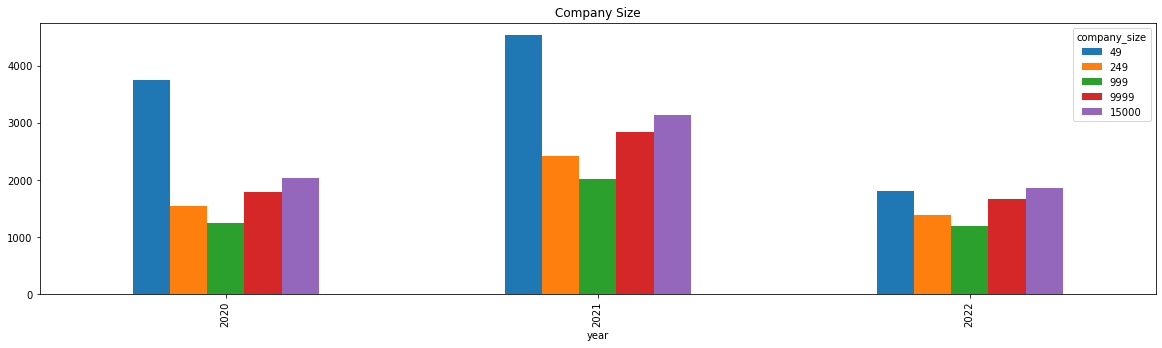

In [11]:
Company_size.groupby('year').sum().plot(
    kind="bar", title="Company Size", figsize=(20, 5)
)
plt.show()

## Salary with year

In [12]:
Salary_man = data[data['gender']=='Man'].pivot_table(index='salary', columns='year', aggfunc='size', fill_value=0)
Salary_woman = data[data['gender']=='Woman'].pivot_table(index='salary', columns='year', aggfunc='size', fill_value=0)
Salary_man

year,2020,2021,2022
salary,,,
"10,000-29,999",1536,2168,1155
"100,000-149,999",743,935,551
"150,000-249,999",393,488,421
"250,000-499,999",88,140,129
"30,000-49,999",920,1198,749
"5,000-9,999",696,1002,617
"50,000-69,999",780,1040,566
"70,000-99,999",796,1014,580
<5000,2723,4414,1714


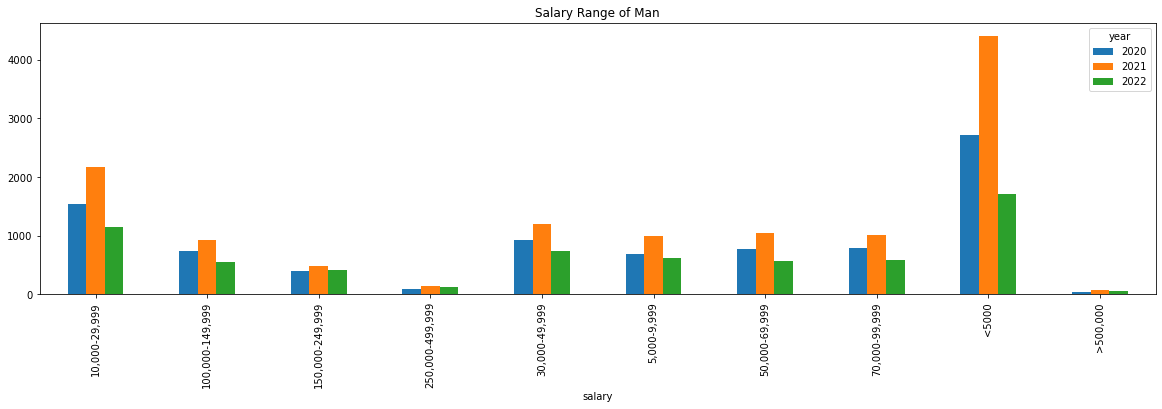

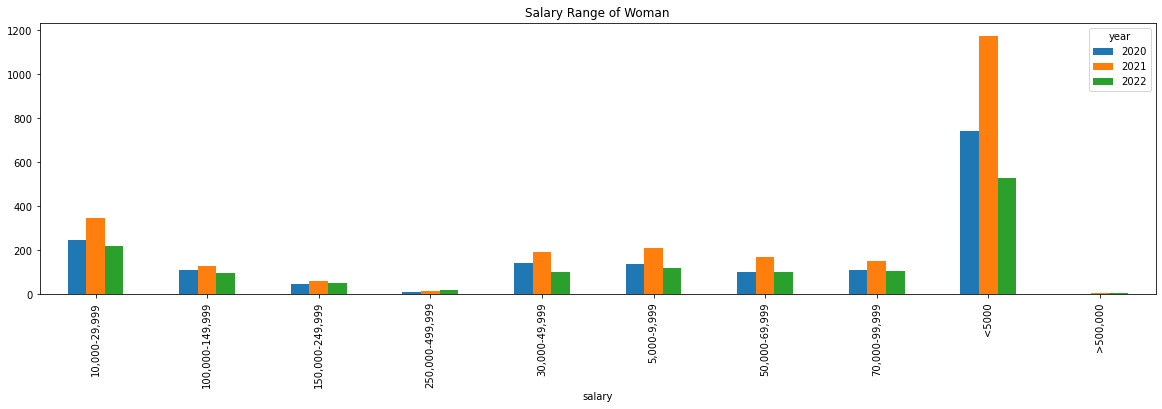

In [13]:

Salary_man.groupby('salary').sum().plot(
    kind="bar", title="Salary Range of Man", figsize=(20, 5)
)
Salary_woman.groupby('salary').sum().plot(
    kind="bar", title="Salary Range of Woman", figsize=(20, 5)
)

plt.show()

## Salary with company size

In [14]:
Salary_Company_man = data[data['gender']=='Man'].pivot_table(index='salary' , columns='company_size' ,aggfunc ='size' ,fill_value=0)
Salary_Company_woman = data[data['gender']=='Woman'].pivot_table(index='salary' , columns='company_size' ,aggfunc ='size' ,fill_value=0)
Salary_Company_man

company_size,49,249,999,9999,15000
salary,,,,,
"10,000-29,999",1188,833,703,1017,1118
"100,000-149,999",423,305,274,529,698
"150,000-249,999",236,163,184,279,440
"250,000-499,999",71,33,36,75,142
"30,000-49,999",637,486,435,612,697
"5,000-9,999",587,429,315,455,529
"50,000-69,999",501,380,329,589,587
"70,000-99,999",477,347,342,623,601
<5000,4253,1412,1021,1103,1062


Text(114.0, 0.5, 'Salary Ranges')

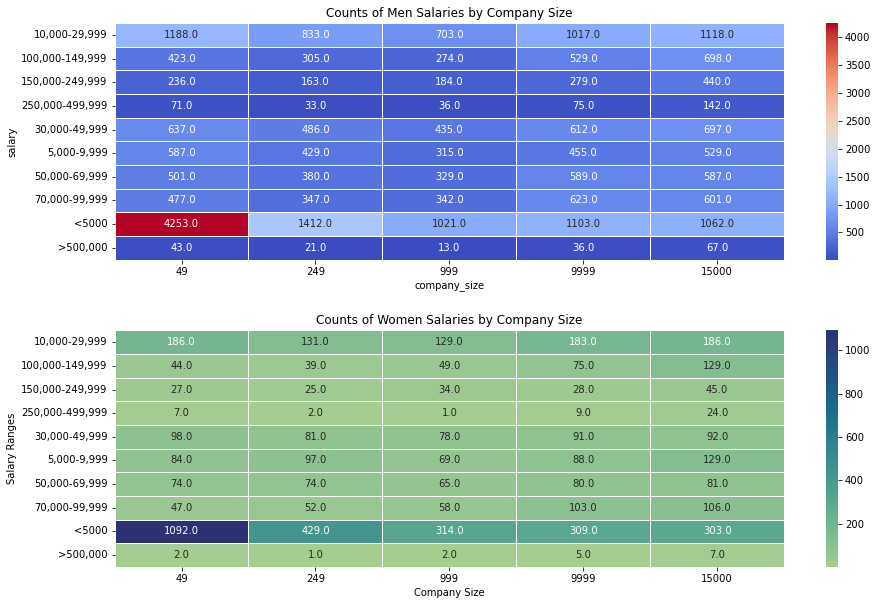

In [15]:
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize=(15, 10))
ax1 = sns.heatmap(Salary_Company_man, annot=True, linewidth=.5,fmt=".1f", cmap="coolwarm",ax=ax[0])
ax2 = sns.heatmap(Salary_Company_woman, annot=True, linewidth=.5,fmt=".1f", cmap="crest",ax=ax[1])

ax1.set_title('Counts of Men Salaries by Company Size')
ax2.set_title('Counts of Women Salaries by Company Size')

plt.subplots_adjust(hspace=0.3)

plt.xlabel('Company Size')
plt.ylabel('Salary Ranges')

## Salary with Role

<Figure size 576x432 with 0 Axes>

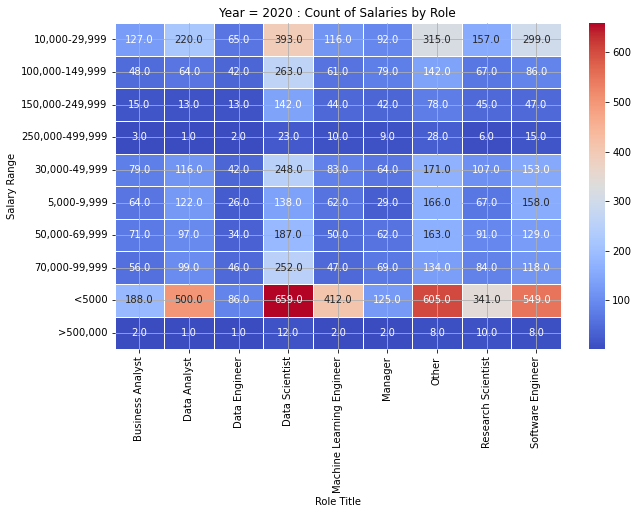

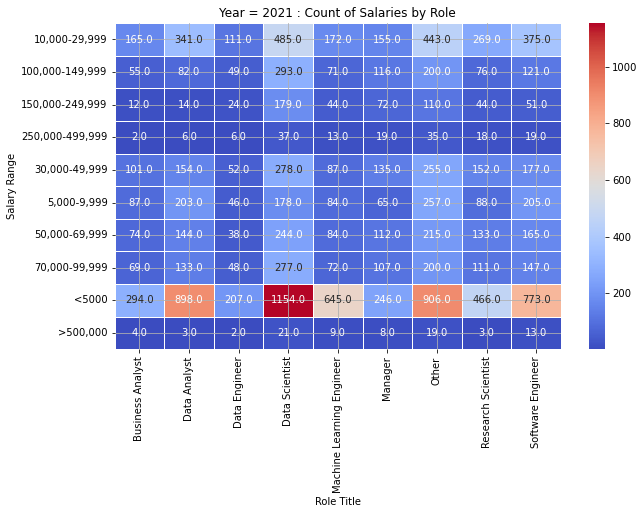

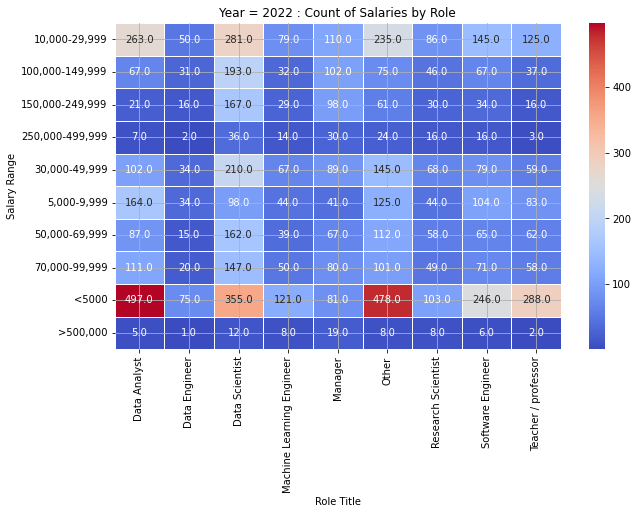

In [16]:
plt.figure(figsize=(8, 6))

for i in range(2020,2023,1):
    plt.figure(figsize=(10, 6))
    tmp = data[data['year']==i]
    
    Salary_Role = tmp.pivot_table(index= 'salary', columns='role_title' ,aggfunc='size',fill_value=0)
    sns.heatmap(Salary_Role, annot=True, linewidth=.5,fmt=".1f", cmap="coolwarm")
    
    plt.title(f'Year = {i} : Count of Salaries by Role')
    plt.xlabel('Role Title')
    plt.ylabel('Salary Range')

    #plt.legend(title='Gender')
    plt.grid(True)

    plt.show()


# Year, Gender and Education

In [17]:
Education_Year_Gender = data.groupby(['year', 'gender', 'highest_edu_lv']).size().reset_index(name='Count')
Education_Year_Gender

,year,gender,highest_edu_lv,Count
0,2020,Man,Bachelor’s degree,2468
1,2020,Man,Doctoral degree,1355
2,2020,Man,Master’s degree,3967
3,2020,Man,Other,595
4,2020,Man,Some college/university study without earning ...,332
5,2020,Woman,Bachelor’s degree,440
6,2020,Woman,Doctoral degree,297
7,2020,Woman,Master’s degree,773
8,2020,Woman,Other,103
9,2020,Woman,Some college/university study without earning ...,37


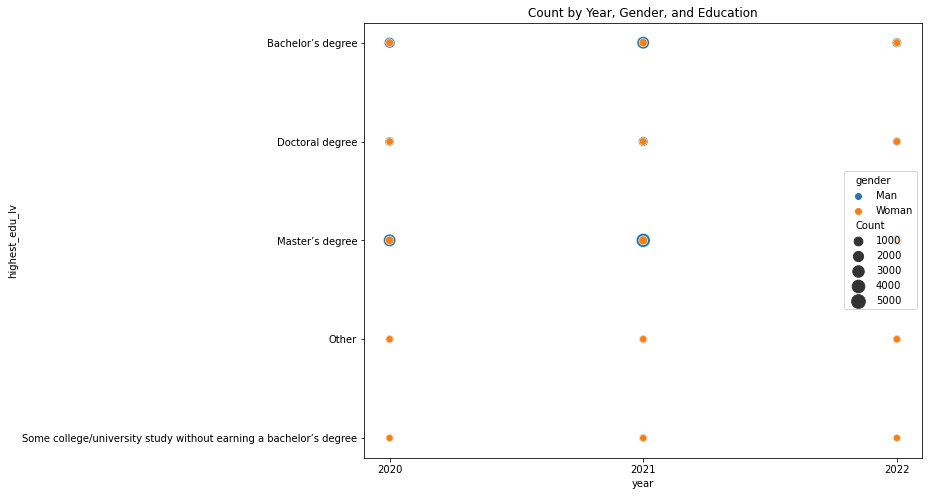

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=Education_Year_Gender, x='year', y='highest_edu_lv', hue='gender', size='Count', sizes=(50, 200))
plt.xticks([2020,2021,2022])
plt.title('Count by Year, Gender, and Education')
plt.show()

## Year, Gender and Salary

In [19]:
Salary_Year_Gender = data.groupby(['year', 'gender', 'salary']).size().reset_index(name='Count')
Salary_Year_Gender

,year,gender,salary,Count
0,2020,Man,"10,000-29,999",1536
1,2020,Man,"100,000-149,999",743
2,2020,Man,"150,000-249,999",393
3,2020,Man,"250,000-499,999",88
4,2020,Man,"30,000-49,999",920
5,2020,Man,"5,000-9,999",696
6,2020,Man,"50,000-69,999",780
7,2020,Man,"70,000-99,999",796
8,2020,Man,<5000,2723
9,2020,Man,">500,000",42


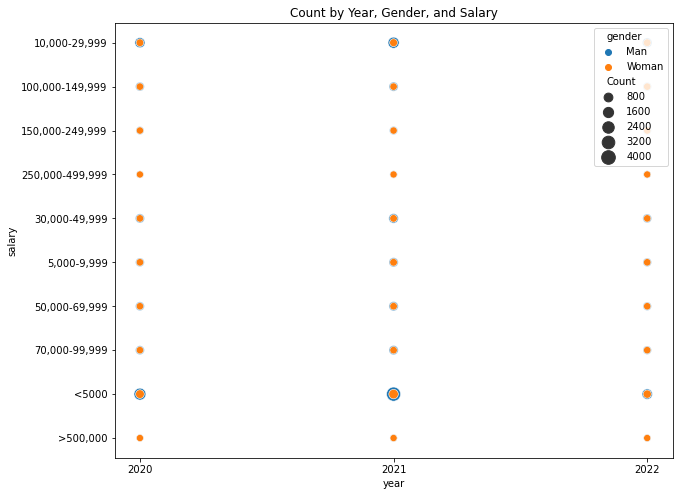

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=Salary_Year_Gender, x='year', y='salary', hue='gender', size='Count', sizes=(50, 200))
plt.xticks([2020,2021,2022])
plt.title('Count by Year, Gender, and Salary')
plt.show()

---------------------